# Novel enhanced quantum representation of digital images - [NEQR](https://www.overleaf.com/project/61911febed45e965f929d7c0#cite.zhang2013neqr)

$| I \rangle = \frac{1}{2^n}\sum_{Y=0}^{2^n-1}\sum_{X=0}^{2^n-1}\bigotimes_{i=0}^{q-1} | C_{YX}^{i}\rangle | YX \rangle$, where

$| C_{YX}^{i}\rangle$ and $| YX \rangle$ are pixel intensity and coordinate expansion respectively

Step 0: dependencies import

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

Step 1: image generation

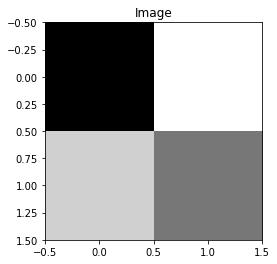

In [3]:
image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

Step 2: NEQR image encoding

In [5]:
idx = QuantumRegister(2, 'idx')
intensity = QuantumRegister(8,'intensity')
cr = ClassicalRegister(10, 'cr')
qc_image = QuantumCircuit(intensity, idx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.i(idx)
qc_image.h(8)
qc_image.h(9)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(2)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            qc_image.ccx(num_qubits-1, num_qubits-2, idx)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
qc_image.measure(range(10),range(10))

Circuit visualization

In [6]:
qc_image.draw()

<pre style="word-wrap: normal;white-space: pre;background: #fff0;line-height: 1.1;font-family: &quot;Courier New&quot;,Courier,monospace">             ┌───┐                     ░                                     ░ »
intensity_0: ┤ I ├─────────────────────░─────────────────────────────────────░─»
             ├───┤┌───┐                ░      ┌───┐                          ░ »
intensity_1: ┤ I ├┤ X ├────────────────░──────┤ X ├──────────────────────────░─»
             ├───┤└─┬─┘┌───┐           ░      └─┬─┘┌───┐                     ░ »
intensity_2: ┤ I ├──┼──┤ X ├───────────░────────┼──┤ X ├─────────────────────░─»
             ├───┤  │  └─┬─┘┌───┐      ░        │  └─┬─┘                     ░ »
intensity_3: ┤ I ├──┼────┼──┤ X ├──────░────────┼────┼───────────────────────░─»
             ├───┤  │    │  └─┬─┘┌───┐ ░        │    │  ┌───┐                ░ »
intensity_4: ┤ I ├──┼────┼────┼──┤ X ├─░────────┼────┼──┤ X ├────────────────░─»
             ├───┤  │    │    │  └─┬─┘ ░        │    │  └─┬─┘┌───┐           ░ »
intensity_5: ┤ I ├──┼────┼────┼────┼───░────────┼────┼────┼──┤ X ├───────────░─»
             ├───┤  │    │    │    │   ░        │    │    │  └─┬─┘           ░ »
intensity_6: ┤ I ├──┼────┼────┼────┼───░────────┼────┼────┼────┼─────────────░─»
             ├───┤  │    │    │    │   ░        │    │    │    │  ┌───┐      ░ »
intensity_7: ┤ I ├──┼────┼────┼────┼───░────────┼────┼────┼────┼──┤ X ├──────░─»
             ├───┤  │    │    │    │   ░ ┌───┐  │    │    │    │  └─┬─┘┌───┐ ░ »
      idx_0: ┤ H ├──■────■────■────■───░─┤ X ├──■────■────■────■────■──┤ X ├─░─»
             ├───┤  │    │    │    │   ░ └───┘  │    │    │    │    │  └───┘ ░ »
      idx_1: ┤ H ├──■────■────■────■───░────────■────■────■────■────■────────░─»
             └───┘                     ░                                     ░ »
      cr: 10/══════════════════════════════════════════════════════════════════»
                                                                               »
«                                            ░      ┌───┐                ░ ┌─┐»
«intensity_0: ───────────────────────────────░──────┤ X ├────────────────░─┤M├»
«                  ┌───┐                     ░      └─┬─┘                ░ └╥┘»
«intensity_1: ─────┤ X ├─────────────────────░────────┼──────────────────░──╫─»
«                  └─┬─┘                     ░        │  ┌───┐           ░  ║ »
«intensity_2: ───────┼───────────────────────░────────┼──┤ X ├───────────░──╫─»
«                    │  ┌───┐                ░        │  └─┬─┘           ░  ║ »
«intensity_3: ───────┼──┤ X ├────────────────░────────┼────┼─────────────░──╫─»
«                    │  └─┬─┘┌───┐           ░        │    │             ░  ║ »
«intensity_4: ───────┼────┼──┤ X ├───────────░────────┼────┼─────────────░──╫─»
«                    │    │  └─┬─┘           ░        │    │  ┌───┐      ░  ║ »
«intensity_5: ───────┼────┼────┼─────────────░────────┼────┼──┤ X ├──────░──╫─»
«                    │    │    │             ░        │    │  └─┬─┘┌───┐ ░  ║ »
«intensity_6: ───────┼────┼────┼─────────────░────────┼────┼────┼──┤ X ├─░──╫─»
«                    │    │    │  ┌───┐      ░        │    │    │  └─┬─┘ ░  ║ »
«intensity_7: ───────┼────┼────┼──┤ X ├──────░────────┼────┼────┼────┼───░──╫─»
«                    │    │    │  └─┬─┘      ░ ┌───┐  │    │    │    │   ░  ║ »
«      idx_0: ───────■────■────■────■────────░─┤ X ├──■────■────■────■───░──╫─»
«             ┌───┐  │    │    │    │  ┌───┐ ░ ├───┤  │    │    │    │   ░  ║ »
«      idx_1: ┤ X ├──■────■────■────■──┤ X ├─░─┤ X ├──■────■────■────■───░──╫─»
«             └───┘                    └───┘ ░ └───┘                     ░  ║ »
«      cr: 10/══════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«                                        
«intensity_0: ───────────────────────────
«             ┌─┐                        
«intensity_1: ┤M├────────────────

Step 3: circuit execution

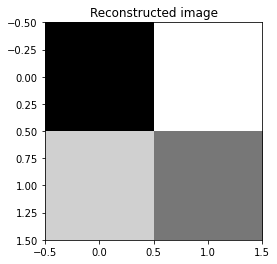

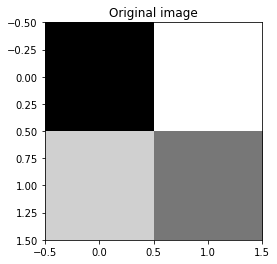

[ 30. 182. 154. 101.] 
 [ 30 182 154 101]


In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:2], 2), int(item[2:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap='gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()
print(out_image.flatten(), '\n', image.flatten())